In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import descartes
from shapely.geometry import Polygon
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping

In [13]:
buf = 1
# read in shapefiles
africa = gpd.read_file("downloaded/Africa_SHP/Africa.shp")
africa.crs = {'init': 'epsg:3857', 'no_defs': True}
markets_buffer = gpd.read_file("saved-output/buffers/market_buffer_" + str(buf) + ".shp")
markets_buffer.at[27, 'market'] = "Nouakchott, Marche SCIM"
markets_buffer.crs = {'init': 'epsg:4326'}
geoms = markets_buffer.geometry.values
geometry = geoms[0]
geoms = [mapping(geoms[0])]
#countries = ["Chad", "Mauritania", "Nigeria"]
#m_b = markets_buffer.loc[markets_buffer.country.isin(countries)]


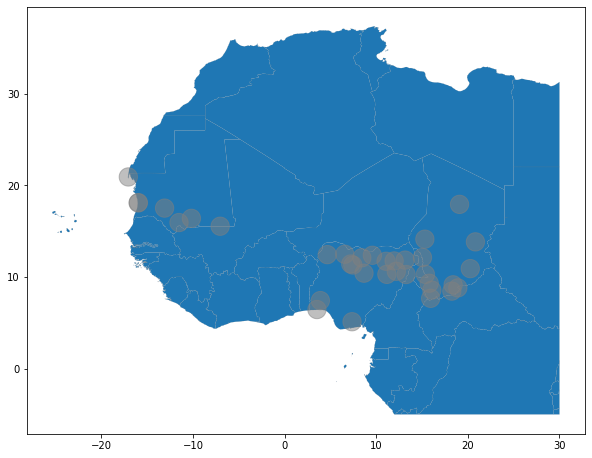

In [12]:
# crop the image because we don't care about the lower half rn
bbox = gpd.GeoSeries([Polygon([(-30,-5), (30, -5), (30, 40), (-30, 40)])])
box = gpd.GeoDataFrame({'geometry': bbox})
box.crs = {'init': 'epsg:3857', 'no_defs': True}
intersec = gpd.overlay(africa, box, how="intersection")

# overlay markets and plot
f, ax = plt.subplots(1, figsize = (10,10))
gpd.plotting.plot_polygon_collection(ax, intersec['geometry'], linewidth=0.1, edgecolor='grey')
gpd.plotting.plot_polygon_collection(ax, markets_buffer['geometry'], color="grey", alpha=(".5"))
plt.gca().set_aspect('equal')


In [15]:
#lets get the season ndvi files
season_end = rasterio.open("saved-output/ndvi_seasonality/season_end_2015.tif") 
season_start = rasterio.open("saved-output/ndvi_seasonality/season_start_2015.tif")
season_max = rasterio.open("saved-output/ndvi_seasonality/season_mid_2015.tif")

In [16]:
plot(season_end)

NameError: name 'plot' is not defined